⏳ Connecting to BigQuery...
✅ Data loaded! Shape: (39652, 16)
🧹 Cleaned Data: Removed 5511 rows with empty prices.
       uid           brand                                                url  \
0    68338  Patek Philippe  https://www.patek.com/en/collection/twenty4/49...   
1  3406239  Patek Philippe  https://www.patek.com/en/collection/twenty4/49...   
2    68179  Patek Philippe  https://www.patek.com/en/collection/twenty4/49...   
3  1301874  Patek Philippe  https://www.patek.com/en/collection/twenty4/49...   
4  3369296  Patek Philippe  https://www.patek.com/en/collection/twenty4/49...   

    price currency                                          image_url  \
0  428000      TWD  https://static.patek.com/images/articles/face_...   
1  448000      TWD  https://static.patek.com/images/articles/face_...   
2   19400      SGD  https://static.patek.com/images/articles/face_...   
3   13000      CHF  https://static.patek.com/images/articles/face_...   
4   20300      SGD  https://stati

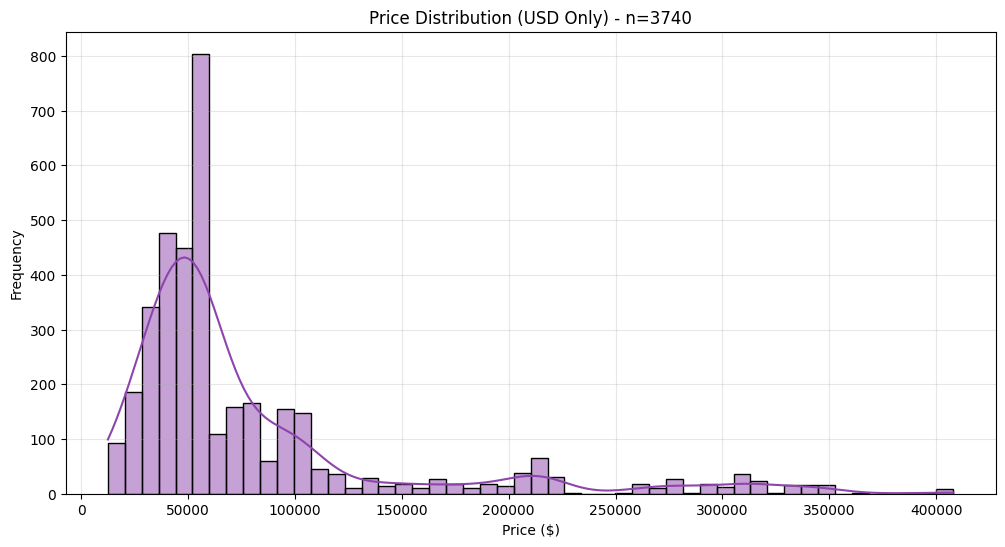

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from patek_analysis.data import get_patek_data

# 1. Get Data
df = get_patek_data()

# 2. CLEANING: Force price to numeric (coerces errors to NaN) and drop bad rows
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

# 3. FILTERING: Let's look at USD only to make the histogram make sense
# (Otherwise we mix Yen and Dollars, which ruins the scale)
df_usd = df[df['currency'] == 'USD'].copy()

# 4. PLOTTING
plt.figure(figsize=(12, 6))

# Plot histogram of USD prices
sns.histplot(df_usd['price'], bins=50, kde=True, color='#8e44ad')

# Formatting
plt.title(f"Price Distribution (USD Only) - n={len(df_usd)}")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

# Use a specific formatter to avoid scientific notation (e.g., '1e6')
plt.ticklabel_format(style='plain', axis='x') 
plt.grid(True, alpha=0.3)

plt.show()